# Análise Exploratória de Dados (EDA) - Camada Bronze

## Dataset: Gastos Diretos do Governo Federal (Brasil.io)

Este notebook realiza uma análise exploratória dos dados brutos (Bronze) de gastos diretos do governo federal, cobrindo o período de 2012 a 2017.

**Objetivos:**
- Compreender a estrutura e qualidade dos dados
- Identificar padrões e tendências
- Detectar inconsistências e valores atípicos
- Avaliar o valor de negócio das colunas

## 1. Importação de Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

## 2. Carregamento dos Dados da Bronze

In [3]:
bronze_path = Path("../dataset/bronze")

# Verificar se a pasta existe
if not bronze_path.exists():
    raise FileNotFoundError("Pasta bronze não encontrada. Execute primeiro a ingestão de dados.")

# Buscar todas as partições
particoes = sorted(list(bronze_path.glob("ano_mes=*/")))
print(f"Total de partições encontradas: {len(particoes)}")

# Listar algumas partições
print("\nPrimeiras partições:")
for particao in particoes[:5]:
    print(f"  - {particao.name}")
print("  ...")
print(f"\nÚltimas partições:")
for particao in particoes[-3:]:
    print(f"  - {particao.name}")

Total de partições encontradas: 68

Primeiras partições:
  - ano_mes=2012_01
  - ano_mes=2012_02
  - ano_mes=2012_03
  - ano_mes=2012_04
  - ano_mes=2012_05
  ...

Últimas partições:
  - ano_mes=2017_10
  - ano_mes=2017_11
  - ano_mes=2017_12


In [4]:
# Carregar todos os dados
print("Carregando dados de todas as partições...")
dfs = []

for particao in particoes:
    arquivos = list(particao.glob("*.parquet"))
    for arquivo in arquivos:
        df_temp = pd.read_parquet(arquivo)
        dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)
print(f"\n Dados carregados com sucesso!")
print(f"Total de registros: {len(df):,}")

Carregando dados de todas as partições...

✓ Dados carregados com sucesso!
Total de registros: 1,007,000


## 3. Visão Geral dos Dados

In [5]:
# Informações gerais
print("=" * 80)
print("INFORMAÇÕES GERAIS DO DATASET")
print("=" * 80)
print(f"\nDimensões: {df.shape[0]:,} linhas × {df.shape[1]} colunas")
print(f"Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColunas disponíveis:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

INFORMAÇÕES GERAIS DO DATASET

Dimensões: 1,007,000 linhas × 30 colunas
Memória utilizada: 1334.42 MB

Colunas disponíveis:
  1. ano
  2. codigo_acao
  3. codigo_elemento_despesa
  4. codigo_favorecido
  5. codigo_funcao
  6. codigo_grupo_despesa
  7. codigo_orgao
  8. codigo_orgao_superior
  9. codigo_programa
  10. codigo_subfuncao
  11. codigo_unidade_gestora
  12. data_pagamento
  13. data_pagamento_original
  14. gestao_pagamento
  15. linguagem_cidada
  16. mes
  17. nome_acao
  18. nome_elemento_despesa
  19. nome_favorecido
  20. nome_funcao
  21. nome_grupo_despesa
  22. nome_orgao
  23. nome_orgao_superior
  24. nome_programa
  25. nome_subfuncao
  26. nome_unidade_gestora
  27. numero_documento
  28. valor
  29. mes_ano
  30. _pagina_origem


In [6]:
# Primeiras linhas
print("\nAMOSTRA DOS DADOS (5 primeiras linhas):")
df.head()


AMOSTRA DOS DADOS (5 primeiras linhas):


,ano,codigo_acao,codigo_elemento_despesa,codigo_favorecido,codigo_funcao,codigo_grupo_despesa,codigo_orgao,codigo_orgao_superior,codigo_programa,codigo_subfuncao,codigo_unidade_gestora,data_pagamento,data_pagamento_original,gestao_pagamento,linguagem_cidada,mes,nome_acao,nome_elemento_despesa,nome_favorecido,nome_funcao,nome_grupo_despesa,nome_orgao,nome_orgao_superior,nome_programa,nome_subfuncao,nome_unidade_gestora,numero_documento,valor,mes_ano,_pagina_origem
0,2012,2000,8,"Informações protegidas por sigilo, nos termos ...",6,3,20118,20000,2101,122,110120,None,"Informações protegidas por sigilo, nos termos ...","Informações protegidas por sigilo, nos termos ...",Administração de unidade,1,Administração da Unidade,Outros Benefícios Assistenciais,"Informações protegidas por sigilo, nos termos ...",Segurança Pública,Outras Despesas Correntes,AGENCIA BRASILEIRA DE INTELIGENCIA - ABIN,PRESIDENCIA DA REPUBLICA,Programa de Gestão e Manutenção da Presidência...,Administração Geral,AGENCIA BRASILEIRA DE INTELIGENCIA,"Informações protegidas por sigilo, nos termos ...",20799.66,2012-01-01,5
1,2012,2272,30,"Informações protegidas por sigilo, nos termos ...",6,3,20118,20000,641,122,110120,None,"Informações protegidas por sigilo, nos termos ...","Informações protegidas por sigilo, nos termos ...",GAP,1,Gestão e Administração do Programa,Material de Consumo,"Informações protegidas por sigilo, nos termos ...",Segurança Pública,Outras Despesas Correntes,AGENCIA BRASILEIRA DE INTELIGENCIA - ABIN,PRESIDENCIA DA REPUBLICA,Inteligência Federal,Administração Geral,AGENCIA BRASILEIRA DE INTELIGENCIA,"Informações protegidas por sigilo, nos termos ...",71556.70,2012-01-01,5
2,2012,2272,33,"Informações protegidas por sigilo, nos termos ...",6,3,20118,20000,641,122,110120,None,"Informações protegidas por sigilo, nos termos ...","Informações protegidas por sigilo, nos termos ...",GAP,1,Gestão e Administração do Programa,Passagens e Despesas com Locomoção,"Informações protegidas por sigilo, nos termos ...",Segurança Pública,Outras Despesas Correntes,AGENCIA BRASILEIRA DE INTELIGENCIA - ABIN,PRESIDENCIA DA REPUBLICA,Inteligência Federal,Administração Geral,AGENCIA BRASILEIRA DE INTELIGENCIA,"Informações protegidas por sigilo, nos termos ...",9931.05,2012-01-01,5
3,2012,2000,33,"Informações protegidas por sigilo, nos termos ...",6,3,20118,20000,2101,122,110120,None,"Informações protegidas por sigilo, nos termos ...","Informações protegidas por sigilo, nos termos ...",Administração de unidade,1,Administração da Unidade,Passagens e Despesas com Locomoção,"Informações protegidas por sigilo, nos termos ...",Segurança Pública,Outras Despesas Correntes,AGENCIA BRASILEIRA DE INTELIGENCIA - ABIN,PRESIDENCIA DA REPUBLICA,Programa de Gestão e Manutenção da Presidência...,Administração Geral,AGENCIA BRASILEIRA DE INTELIGENCIA,"Informações protegidas por sigilo, nos termos ...",8410.87,2012-01-01,5
4,2012,2684,33,"Informações protegidas por sigilo, nos termos ...",6,3,20118,20000,641,183,110120,None,"Informações protegidas por sigilo, nos termos ...","Informações protegidas por sigilo, nos termos ...",None,1,Ações de Inteligência,Passagens e Despesas com Locomoção,"Informações protegidas por sigilo, nos termos ...",Segurança Pública,Outras Despesas Correntes,AGENCIA BRASILEIRA DE INTELIGENCIA - ABIN,PRESIDENCIA DA REPUBLICA,Inteligência Federal,Informação e Inteligência,AGENCIA BRASILEIRA DE INTELIGENCIA,"Informações protegidas por sigilo, nos termos ...",10663.67,2012-01-01,5


In [7]:
# Tipos de dados
print("TIPOS DE DADOS:")
print(df.dtypes)

TIPOS DE DADOS:
ano                                 int64
codigo_acao                        object
codigo_elemento_despesa             int64
codigo_favorecido                  object
codigo_funcao                       int64
codigo_grupo_despesa                int64
codigo_orgao                        int64
codigo_orgao_superior               int64
codigo_programa                     int64
codigo_subfuncao                    int64
codigo_unidade_gestora              int64
data_pagamento                     object
data_pagamento_original            object
gestao_pagamento                   object
linguagem_cidada                   object
mes                                 int64
nome_acao                          object
nome_elemento_despesa              object
nome_favorecido                    object
nome_funcao                        object
nome_grupo_despesa                 object
nome_orgao                         object
nome_orgao_superior                object
nome_programa     

## 4. Qualidade dos Dados

In [8]:
# Análise de valores nulos
print("=" * 80)
print("ANÁLISE DE VALORES NULOS")
print("=" * 80)

nulos = df.isnull().sum()
nulos_percent = (df.isnull().sum() / len(df) * 100).round(2)

qualidade_df = pd.DataFrame({
    'Coluna': df.columns,
    'Valores Nulos': nulos.values,
    'Percentual (%)': nulos_percent.values,
    'Valores Únicos': [df[col].nunique() for col in df.columns],
    'Tipo': df.dtypes.values
})

qualidade_df = qualidade_df.sort_values('Valores Nulos', ascending=False)
qualidade_df

ANÁLISE DE VALORES NULOS


,Coluna,Valores Nulos,Percentual (%),Valores Únicos,Tipo
12,data_pagamento_original,1002898,99.59,1,object
14,linguagem_cidada,628853,62.45,79,object
11,data_pagamento,4102,0.41,12,object
2,codigo_elemento_despesa,0,0.00,35,int64
0,ano,0,0.00,6,int64
3,codigo_favorecido,0,0.00,466316,object
5,codigo_grupo_despesa,0,0.00,3,int64
4,codigo_funcao,0,0.00,27,int64
6,codigo_orgao,0,0.00,288,int64
7,codigo_orgao_superior,0,0.00,24,int64


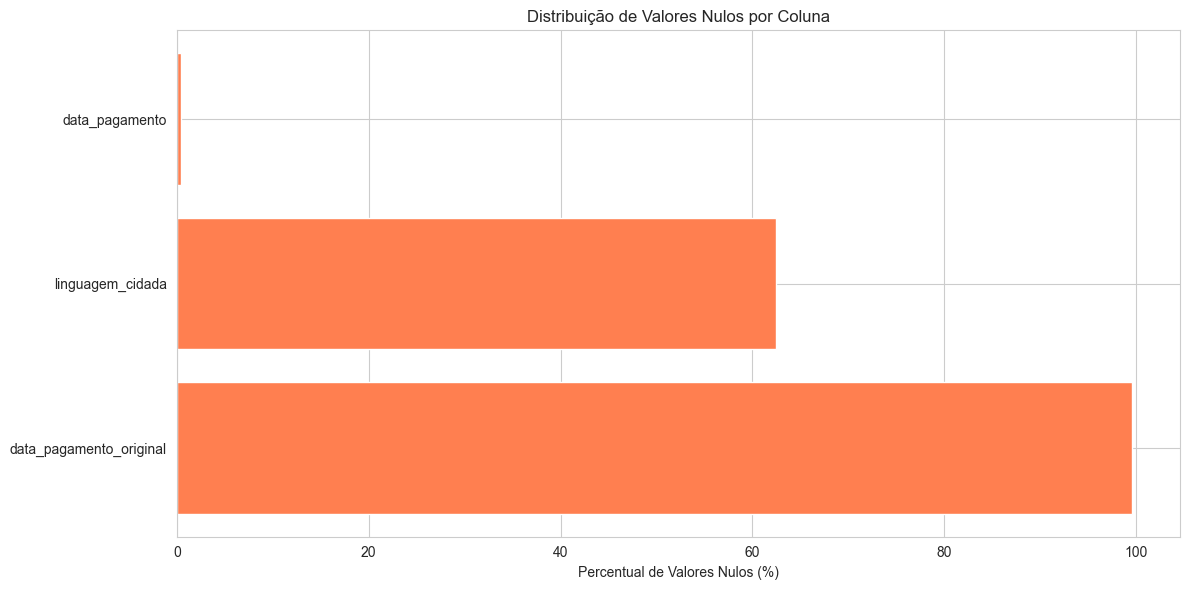

In [9]:
# Visualizar nulos
plt.figure(figsize=(12, 6))
colunas_com_nulos = qualidade_df[qualidade_df['Valores Nulos'] > 0]

if len(colunas_com_nulos) > 0:
    plt.barh(colunas_com_nulos['Coluna'], colunas_com_nulos['Percentual (%)'], color='coral')
    plt.xlabel('Percentual de Valores Nulos (%)')
    plt.title('Distribuição de Valores Nulos por Coluna')
    plt.tight_layout()
    plt.show()
else:
    print("✓ Nenhum valor nulo encontrado no dataset!")

In [10]:
# Duplicatas
duplicatas = df.duplicated().sum()
print(f"\n{'=' * 80}")
print(f"DUPLICATAS")
print(f"{'=' * 80}")
print(f"Total de registros duplicados: {duplicatas:,} ({duplicatas/len(df)*100:.2f}%)")


DUPLICATAS
Total de registros duplicados: 0 (0.00%)


## 5. Análise de Valores Numéricos

In [11]:
# Converter valor para numérico se necessário
if 'valor' in df.columns:
    df['valor'] = pd.to_numeric(df['valor'], errors='coerce')
    
# Estatísticas descritivas
print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS - VALORES FINANCEIROS")
print("=" * 80)

if 'valor' in df.columns:
    print(f"\nValor Total: R$ {df['valor'].sum():,.2f}")
    print(f"Valor Médio: R$ {df['valor'].mean():,.2f}")
    print(f"Valor Mediano: R$ {df['valor'].median():,.2f}")
    print(f"Desvio Padrão: R$ {df['valor'].std():,.2f}")
    print(f"\nValor Mínimo: R$ {df['valor'].min():,.2f}")
    print(f"Valor Máximo: R$ {df['valor'].max():,.2f}")
    
    # Quartis
    print(f"\nQuartis:")
    print(f"  25%: R$ {df['valor'].quantile(0.25):,.2f}")
    print(f"  50%: R$ {df['valor'].quantile(0.50):,.2f}")
    print(f"  75%: R$ {df['valor'].quantile(0.75):,.2f}")
    print(f"  95%: R$ {df['valor'].quantile(0.95):,.2f}")
    print(f"  99%: R$ {df['valor'].quantile(0.99):,.2f}")
else:
    print("Coluna 'valor' não encontrada no dataset")

ESTATÍSTICAS DESCRITIVAS - VALORES FINANCEIROS

Valor Total: R$ 20,446,890,915.34
Valor Médio: R$ 20,304.76
Valor Mediano: R$ 400.00
Desvio Padrão: R$ 4,720,504.78

Valor Mínimo: R$ 0.01
Valor Máximo: R$ 4,552,162,080.54

Quartis:
  25%: R$ 250.00
  50%: R$ 400.00
  75%: R$ 1,500.00
  95%: R$ 11,764.53
  99%: R$ 89,790.82


## 6. Análise Temporal

GASTOS POR ANO
           Valor Total  Quantidade  Valor Médio
ano                                            
2012     59,828,385.97         780    76,703.06
2013     43,316,204.79         466    92,953.23
2014     70,596,332.10         760    92,889.91
2015     55,861,303.11         635    87,970.56
2016     92,434,412.10         777   118,963.21
2017 20,124,854,277.27     1003582    20,053.02


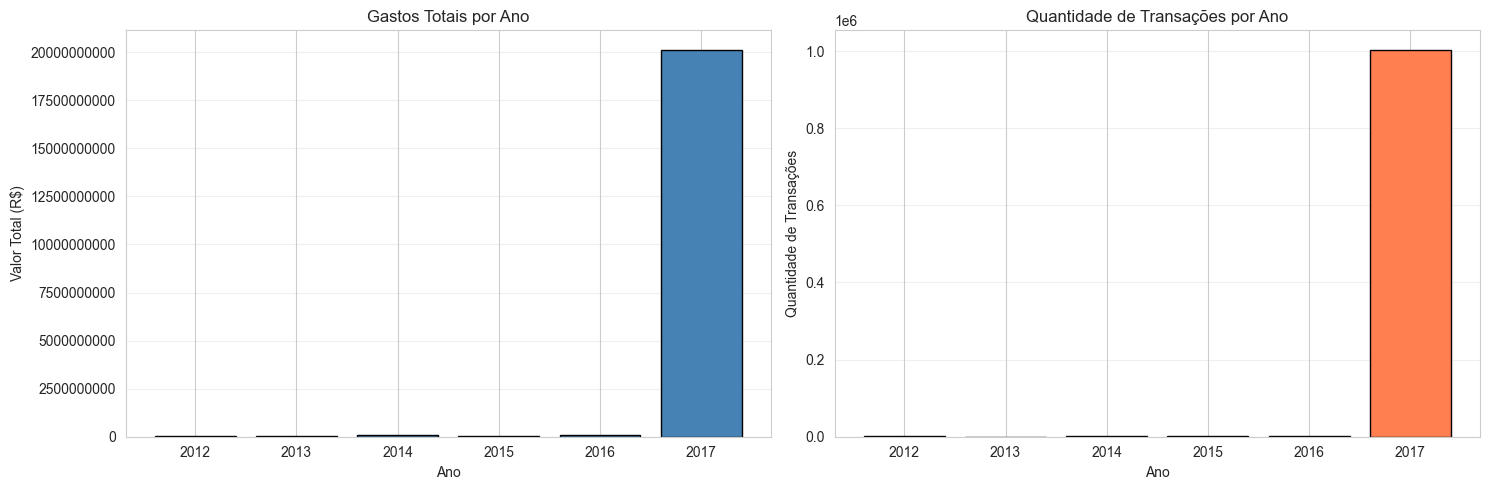

In [14]:
# Análise por ano
if 'ano' in df.columns and 'valor' in df.columns:
    df['ano'] = pd.to_numeric(df['ano'], errors='coerce')
    
    gastos_por_ano = df.groupby('ano')['valor'].agg(['sum', 'count', 'mean'])
    gastos_por_ano.columns = ['Valor Total', 'Quantidade', 'Valor Médio']
    
    print("=" * 80)
    print("GASTOS POR ANO")
    print("=" * 80)
    print(gastos_por_ano)
    
    # Visualização
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Valor total por ano
    axes[0].bar(gastos_por_ano.index, gastos_por_ano['Valor Total'], color='steelblue', edgecolor='black')
    axes[0].set_xlabel('Ano')
    axes[0].set_ylabel('Valor Total (R$)')
    axes[0].set_title('Gastos Totais por Ano')
    axes[0].ticklabel_format(style='plain', axis='y')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Quantidade de transações por ano
    axes[1].bar(gastos_por_ano.index, gastos_por_ano['Quantidade'], color='coral', edgecolor='black')
    axes[1].set_xlabel('Ano')
    axes[1].set_ylabel('Quantidade de Transações')
    axes[1].set_title('Quantidade de Transações por Ano')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()


GASTOS POR MÊS (Consolidado)
    Mês       Valor Total  Valor Médio
0     1     26,157,434.71   108,537.07
1     2     31,487,193.65   106,375.65
2     3     29,125,438.37   119,857.77
3     4     30,359,931.32   131,999.70
4     5     35,653,279.71   145,523.59
5     6     31,288,333.12    99,013.71
6     7     34,186,188.36   102,048.32
7     8     28,065,572.52    72,148.00
8     9     26,346,892.01    61,558.16
9    10     33,174,558.77    68,826.89
10   11     32,070,929.53    78,798.35
11   12 20,108,975,163.27    20,041.08


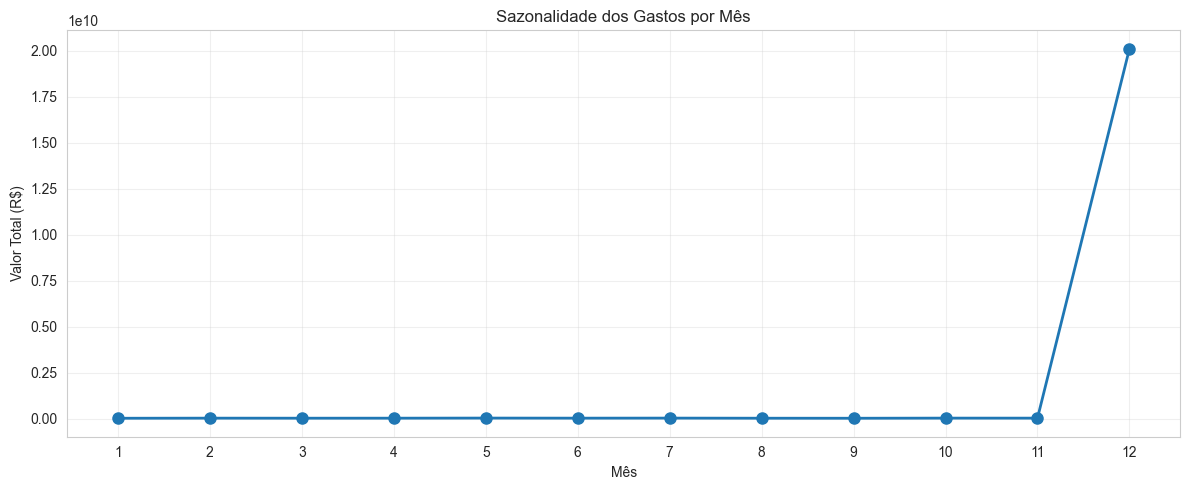

In [15]:
# Análise por mês
if 'mes' in df.columns and 'valor' in df.columns:
    df['mes'] = pd.to_numeric(df['mes'], errors='coerce')
    
    gastos_por_mes = df.groupby('mes')['valor'].agg(['sum', 'mean']).reset_index()
    gastos_por_mes.columns = ['Mês', 'Valor Total', 'Valor Médio']
    
    print("\n" + "=" * 80)
    print("GASTOS POR MÊS (Consolidado)")
    print("=" * 80)
    print(gastos_por_mes)
    
    # Visualização
    plt.figure(figsize=(12, 5))
    plt.plot(gastos_por_mes['Mês'], gastos_por_mes['Valor Total'], marker='o', linewidth=2, markersize=8)
    plt.xlabel('Mês')
    plt.ylabel('Valor Total (R$)')
    plt.title('Sazonalidade dos Gastos por Mês')
    plt.xticks(range(1, 13))
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

## 8. Valor de Negócio das Colunas

In [21]:
# Avaliar valor de negócio de cada coluna
print("=" * 80)
print("AVALIAÇÃO DO VALOR DE NEGÓCIO DAS COLUNAS")
print("=" * 80)

valor_negocio = {
    'Coluna': [],
    'Completude (%)': [],
    'Cardinalidade': [],
    'Valor de Negócio': [],
    'Justificativa': []
}

for col in df.columns:
    completude = (1 - df[col].isnull().sum() / len(df)) * 100
    cardinalidade = df[col].nunique()
    
    # Avaliar valor de negócio
    if col in ['valor', 'ano', 'mes', 'mes_ano']:
        valor = 'CRÍTICO'
        justificativa = 'Essencial para análises financeiras e temporais'
    elif col in ['orgao', 'favorecido', 'unidade_gestora']:
        valor = 'ALTO'
        justificativa = 'Identificação de agentes envolvidos'
    elif col in ['uf_favorecido', 'tipo_favorecido']:
        valor = 'MÉDIO'
        justificativa = 'Segmentação e análise geográfica/categórica'
    elif col == '_pagina_origem':
        valor = 'BAIXO'
        justificativa = 'Metadado técnico, não relevante para negócio'
    else:
        valor = 'MÉDIO'
        justificativa = 'Informação complementar'
    
    valor_negocio['Coluna'].append(col)
    valor_negocio['Completude (%)'].append(round(completude, 2))
    valor_negocio['Cardinalidade'].append(cardinalidade)
    valor_negocio['Valor de Negócio'].append(valor)
    valor_negocio['Justificativa'].append(justificativa)

df_valor_negocio = pd.DataFrame(valor_negocio)
df_valor_negocio = df_valor_negocio.sort_values('Valor de Negócio', ascending=False)
df_valor_negocio

AVALIAÇÃO DO VALOR DE NEGÓCIO DAS COLUNAS


,Coluna,Completude (%),Cardinalidade,Valor de Negócio,Justificativa
13,gestao_pagamento,100.00,182,MÉDIO,Informação complementar
14,linguagem_cidada,37.55,79,MÉDIO,Informação complementar
25,nome_unidade_gestora,100.00,2751,MÉDIO,Informação complementar
24,nome_subfuncao,100.00,93,MÉDIO,Informação complementar
23,nome_programa,100.00,142,MÉDIO,Informação complementar
22,nome_orgao_superior,100.00,24,MÉDIO,Informação complementar
21,nome_orgao,100.00,287,MÉDIO,Informação complementar
20,nome_grupo_despesa,100.00,3,MÉDIO,Informação complementar
19,nome_funcao,100.00,27,MÉDIO,Informação complementar
18,nome_favorecido,100.00,579845,MÉDIO,Informação complementar


## 9. Insights e Conclusões

In [23]:
# Gerar resumo executivo
print("=" * 80)
print("RESUMO EXECUTIVO - EDA CAMADA BRONZE")
print("=" * 80)

print(f"\n VOLUME DE DADOS")
print(f"  - Total de registros: {len(df):,}")
print(f"  - Período analisado: {df['ano'].min():.0f} - {df['ano'].max():.0f}")
print(f"  - Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if 'valor' in df.columns:
    print(f"\n VALORES FINANCEIROS")
    print(f"  - Valor total: R$ {df['valor'].sum():,.2f}")
    print(f"  - Valor médio por transação: R$ {df['valor'].mean():,.2f}")
    print(f"  - Maior transação: R$ {df['valor'].max():,.2f}")

print(f"\n DIMENSÕES PRINCIPAIS")
if 'orgao' in df.columns:
    print(f"  - Órgãos distintos: {df['orgao'].nunique():,}")
if 'favorecido' in df.columns:
    print(f"  - Favorecidos distintos: {df['favorecido'].nunique():,}")
if 'uf_favorecido' in df.columns:
    print(f"  - UFs representadas: {df['uf_favorecido'].nunique()}")

print(f"\n QUALIDADE DOS DADOS")
print(f"  - Duplicatas: {df.duplicated().sum():,} ({df.duplicated().sum()/len(df)*100:.2f}%)")
colunas_com_nulos = (df.isnull().sum() > 0).sum()
print(f"  - Colunas com valores nulos: {colunas_com_nulos}/{len(df.columns)}")

print("\n" + "=" * 80)

RESUMO EXECUTIVO - EDA CAMADA BRONZE

 VOLUME DE DADOS
  - Total de registros: 1,007,000
  - Período analisado: 2012 - 2017
  - Memória utilizada: 1450.21 MB

 VALORES FINANCEIROS
  - Valor total: R$ 20,446,890,915.34
  - Valor médio por transação: R$ 20,304.76
  - Maior transação: R$ 4,552,162,080.54

 DIMENSÕES PRINCIPAIS

 QUALIDADE DOS DADOS
  - Duplicatas: 0 (0.00%)
  - Colunas com valores nulos: 3/30

